# Кинетические уравнения Лотки

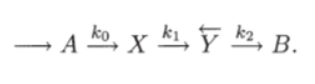

Применим для исследования стационарного состояния этой модели метод линеаризации.

Пусть в некотором объеме находится в избытке вещество А. Молекулы вещества А с некоторой постоянной скоростью ко превращаются в молекулы веществах (реакция нулевого порядка). Вещество X может превращаться в вещество Y, причем скорость этой реакции тем больше, чем больше концентрации как вещества X, так и вещества Y (реакция второго порядка). В схеме это отражено обратной стрелкой над символом Y. Молекулы Y в свою очередь необратимо распадаются со скоростью, пропорциональной концентрации вещества Y. В результате образуется вещество В (реакция первого порядка).

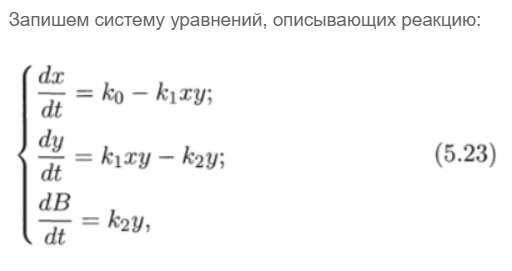

х, у, В — концентрации химических компонентов

k0, k1, k2 - скорости превращения молекул в молекулы другого вещества

In [47]:
import numpy as np
import matplotlib.pyplot as plt

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

from ipywidgets import interact

import warnings
warnings.filterwarnings("ignore")

In [48]:
def model(t, s, k0, k1, k2):
    x, y, b = s
    fxd = k0 - (k1 * x * y)
    fyd = y * (k1 * x - k2)
    fbd = k2 * y
    return np.array([fxd, fyd, fbd], float)

In [49]:
k0 = 1.3
k1 = 7.6
k2 = 20.1

X0 = 0.1
Y0 = 4.6
B0 = 8.3

t0 = 0
tf = 10
dt = 0.01


m0 = np.array([X0, Y0, B0])

f = lambda t, x: model(t, x, k0, k1, k2)

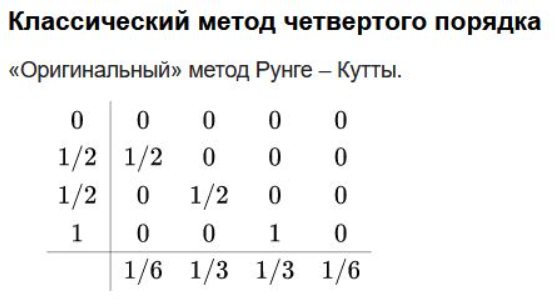

In [50]:
# Реализуем метод Рунге-Кутты 4-го порядка

"""
t0 и tf - начальный и конечный момент времени
dt - шаг времени
x0 - массив значений в начальный момент времени

"""

def RungeKutta4(f, m0, t0, tf, dt):
    
    # Массив всех t от t0 до tf с шагом dt
    
    t = np.arange(t0, tf, dt)
    nt = t.size
    
    # Массив из nx строк и nt столбцов, пока что заполненный нулями
    nx = m0.size
    x = np.zeros((nx, nt))
    
    # Заполняем первый столбец (при t = 0) начальными значениями
    
    x[:,0] = m0
    
    for k in range(nt - 1):
        
        # Коэфициенты для метода РК
        
        k1 = f(t[k], x[:,k])
        k2 = f(t[k] + dt/2, x[:,k] + dt*k1/2)
        k3 = f(t[k] + dt/2, x[:,k] + dt*k2/2)
        k4 = f(t[k] + dt, x[:,k] + dt*k3)
        
        dx = dt*(k1 +2*k2 +2*k3 +k4)/6
        
        # Запись новых значений в текущий момент времени
        
        x[:, k+1] = x[:,k] + dx
        
    return x, t

In [51]:
# Решение методом Рунге-Кутты 4-го порядка

x, t = RungeKutta4(f, m0, t0, tf, dt)

In [52]:
# Визуализируем решения для метода Рунге-Кутты 4-го порядка
def plot(x, t):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=t, y=x[0,:], name="Концентрация в-ва X"))
    fig.add_trace(go.Scatter(x=t, y=x[1,:], name="Концентрация в-ва Y"))
    fig.add_trace(go.Scatter(x=t, y=x[2,:], name="Концентрация в-ва B"))
    fig.update_layout(legend_orientation="h", xaxis_title="Время (t)", margin=dict(l=0, r=0, t=30, b=0))
    fig.show()


plot(x, t)

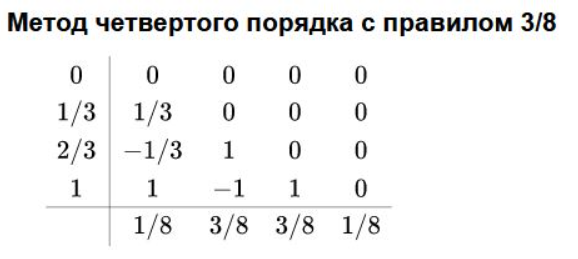

In [53]:
# Реализуем метод Рунге-Кутты 4-го порядка с правилом 3/8

"""
t0 и tf - начальный и конечный момент времени
dt - шаг времени
x0 - массив значений в начальный момент времени

"""

def RungeKutta_3_8(f, x0, t0, tf, dt):
    
    # Массив всех t от t0 до tf с шагом dt
    
    t = np.arange(t0, tf, dt)
    nt = t.size
    
    # Массив из nx строк и nt столбцов, пока что заполненный нулями
    nx = x0.size
    x = np.zeros((nx, nt))
    
    # Заполняем первый столбец (при t = 0) начальными значениями
    
    x[:,0] = x0
    
    for k in range(nt - 1):
        
        # Коэфициенты для метода РК
        
        k1 = f(t[k], x[:,k])
        k2 = f(t[k] + dt/3, x[:,k] + dt*k1/3)
        k3 = f(t[k] + 2*dt/3, x[:,k] - dt*k1/3 + dt*k2)
        k4 = f(t[k] + dt, x[:,k] + dt*k1 - dt*k2 +dt*k3)
        
        dx = dt*(k1 +3*k2 +3*k3 +k4)/8
        
        # Запись новых значений в текущий момент времени
        
        x[:, k+1] = x[:,k] + dx
        
    return x, t

In [54]:
# решение метода Рунге-Кутты 4-го порядка с правилом 3/8

x, t = RungeKutta_3_8(f, m0, t0, tf, dt)

In [55]:
plot(x, t)

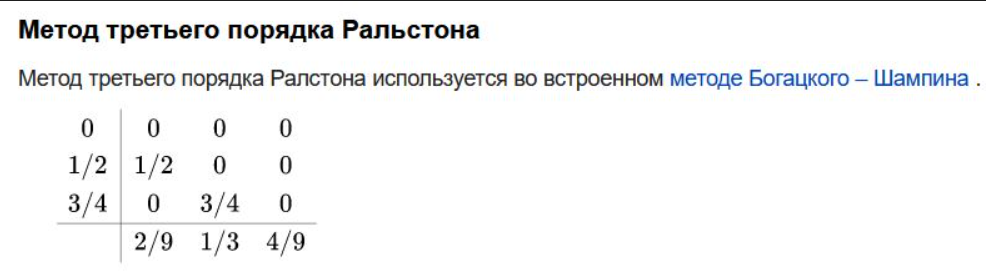

In [56]:
# Реализуем метод Ральстона 3-го порядка

"""
t0 и tf - начальный и конечный момент времени
dt - шаг времени
x0 - массив значений в начальный момент времени

"""

def Rolstone3(f, x0, t0, tf, dt):
    
    # Массив всех t от t0 до tf с шагом dt
    
    t = np.arange(t0, tf, dt)
    nt = t.size
    
    # Массив из nx строк и nt столбцов, пока что заполненный нулями
    nx = x0.size
    x = np.zeros((nx, nt))
    
    # Заполняем первый столбец (при t = 0) начальными значениями
    
    x[:,0] = x0
    
    for k in range(nt - 1):
        
        # Коэфициенты для метода 
        
        k1 = f(t[k], x[:,k])
        k2 = f(t[k] + dt/2, x[:,k] + dt*k1/2)
        k3 = f(t[k] + 3*dt/4, x[:,k] + 3*dt*k2/4)
        
        dx = dt*(2*k1/3 + k2 + 4*k3/3)/3
        
        # Запись новых значений в текущий момент времени
        
        x[:, k+1] = x[:,k] + dx
        
    return x, t

In [57]:
# Решение методом Ральстона 3-го порядка

x, t = Rolstone3(f, m0, t0, tf, dt)

In [58]:
# Визуализируем решение методом Ральстона 3-го порядка

plot(x, t)

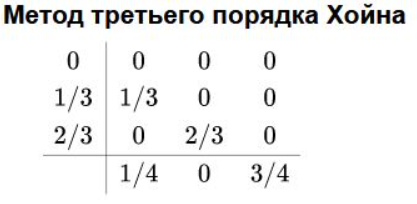

In [59]:
"""
t0 и tf - начальный и конечный момент времени
dt - шаг времени
x0 - массив значений в начальный момент времени

"""

def Hoyne3(f, x0, t0, tf, dt):
    
    # Массив всех t от t0 до tf с шагом dt
    
    t = np.arange(t0, tf, dt)
    nt = t.size
    
    # Массив из nx строк и nt столбцов, пока что заполненный нулями
    nx = x0.size
    x = np.zeros((nx, nt))
    
    # Заполняем первый столбец (при t = 0) начальными значениями
    
    x[:,0] = x0
    
    for k in range(nt - 1):
        
        # Коэфициенты для метода 
        
        k1 = f(t[k], x[:,k])
        k2 = f(t[k] + dt/3, x[:,k] + dt*k1/3)
        k3 = f(t[k] + 2*dt/3, x[:,k] + 2*dt*k2/3)
        
        dx = dt*(1*k1/4 + 0*k2 + 3*k3/4)
        
        # Запись новых значений в текущий момент времени
        
        x[:, k+1] = x[:,k] + dx
        
    return x, t

In [60]:
x, t = Hoyne3(f, m0, t0, tf, dt)

In [61]:
plot(x, t)

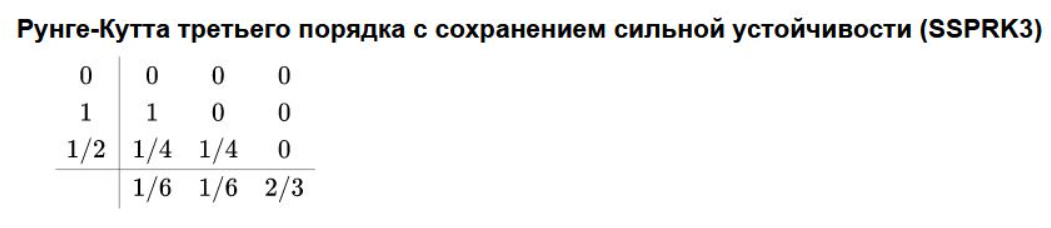

In [62]:
def ssprk3(f, x0, t0, tf, dt):
    
    # Массив всех t от t0 до tf с шагом dt
    
    t = np.arange(t0, tf, dt)
    nt = t.size
    
    # Массив из nx строк и nt столбцов, пока что заполненный нулями
    nx = x0.size
    x = np.zeros((nx, nt))

    
    # Заполняем первый столбец (при t = 0) начальными значениями
    
    x[:,0] = x0
    
    for k in range(nt - 1):
        
        # Коэфициенты для метода 
        
        k1 = f(t[k], x[:,k])
        k2 = f(t[k] + dt, x[:,k] + dt*k1)
        k3 = f(t[k] + dt/2, x[:,k] + dt*k1/4 + dt*k2/4)
        
        dx = dt*(k1/2 + k2/2 + 2*k3)/3
        
        # Запись новых значений в текущий момент времени
        
        x[:, k+1] = x[:,k] + dx
        
    return x, t

In [63]:
x, t = ssprk3(f, m0, t0, tf, dt)
plot(x, t)

In [64]:
def compare_solutions(t0, tf, dt, x1, x2):
    nx = m0.size
    t = np.arange(t0, tf, dt)
    nt = t.size
    x = np.zeros((nx, nt))
    for k in range(nt - 1):
        x[:, k] = x1[:,k] - x2[:,k]
    return x, t

def get_dt(func, acc = 0.00001, k0=1.3, k1=7.6, k2=20.1, tf=100):
    X0 = 0.1
    Y0 = 4.6
    B0 = 8.3
    t0 = 0
    x0 = np.array([X0, Y0, B0])
    f = lambda t, x: model(t, x, k0, k1, k2)
    dt = tf/2-1
    flag1 = 0
    flag2 = 0
    while dt >= 0.00001:
        x1, t1 = RungeKutta4(f, x0, t0, tf, dt)
        x2, t2 = func(f, x0, t0, tf, dt)
        x, t = compare_solutions(t0, tf, dt, x1, x2)
        for k in range(t.size - 1):
            for m in range(len(x[:, k])):
                if abs(x[:, k][m]) / x1[:, k][m] > acc:
                    flag1 = 1
                    break
            if flag1:
                flag1 = 0
                flag2 = 1
                break
        if not flag2:
            print("Необходимый максимальный шаг:", dt, "ед.")
            return dt
        else:
            flag2 = 0
            dt -= 0.01
            
def get_kl(func, k0=1.3, k1=7.6, k2=20.1, tf=100):
    acc = float(input("Введите необходимую точность: "))
    print(f"Необходимая точность: {acc}")
    dt = get_dt(func, acc)
    t = np.arange(t0, tf, dt)
    nt = t.size
    print("Необходимо рассчитать правую часть системы раз:",nt)

# Сравнение методов РК 4-го порядка и РК 4-го пор. 3/8

In [65]:
def interact_comp1(k0=1.3, k1=7.6, k2=20.1, tf = 100, dt = 0.01):
#     dt = 0.01
    X0 = 0.1
    Y0 = 4.6
    B0 = 8.3
    t0 = 0
    x0 = np.array([X0, Y0, B0])
    f = lambda t, x: model(t, x, k0, k1, k2)
    x1, t1 = RungeKutta4(f, x0, t0, tf, dt)
    x2, t2 = RungeKutta_3_8(f, x0, t0, tf, dt)
    x, t = compare_solutions(t0, tf, dt, x1, x2)
    plot(x, t)

interact_comp1(k0, k1, k2, tf, dt)


In [73]:
get_kl(RungeKutta_3_8)

Необходимая точность: 1.0
Необходимый максимальный шаг: 49.0 ед.
Необходимо рассчитать правую часть системы раз: 3


# Cравнение метода РК 4-го порядка и метода РК 3-го порядка с сохранением сильной устойчивости

In [67]:
def interact_comp2(k0=1.3, k1=7.6, k2=20.1, tf = 100, dt = 0.01):
#     dt = 0.01
    X0 = 0.1
    Y0 = 4.6
    B0 = 8.3
    t0 = 0
    x0 = np.array([X0, Y0, B0])
    f = lambda t, x: model(t, x, k0, k1, k2)
    x1, t1 = RungeKutta4(f, x0, t0, tf, dt)
    x2, t2 = ssprk3(f, x0, t0, tf, dt)
    x, t = compare_solutions(t0, tf, dt, x1, x2)
    plot(x, t)

interact_comp2(k0, k1, k2, tf, dt)

In [68]:
get_kl(ssprk3)

Необходимая точность: 0.1
Необходимый максимальный шаг: 0.02000000000117786 ед.
Необходимо рассчитать правую часть системы раз: 5000


# Cравнение метода РК 4-го порядка и метода Хойна 3-го порядка

In [69]:
def interact_comp3(k0=1.3, k1=7.6, k2=20.1, tf = 100, dt = 0.01):
     X0 = 0.1
     Y0 = 4.6
     B0 = 8.3
     t0 = 0
     x0 = np.array([X0, Y0, B0])
     f = lambda t, x: model(t, x, k0, k1, k2)
     x1, t1 = RungeKutta4(f, x0, t0, tf, dt)
     x2, t2 = Hoyne3(f, x0, t0, tf, dt)
     x, t = compare_solutions(t0, tf, dt, x1, x2)
     plot(x, t)

interact_comp3(k0, k1, k2, tf, dt)

In [70]:
get_kl(Hoyne3)

Необходимая точность: 0.001
Необходимо рассчитать правую часть системы раз: 100


# Cравнение метода РК 4-го порядка и метода Ральстона 3-го порядка

In [71]:
def interact_comp4(k0=1.3, k1=7.6, k2=20.1, tf = 100, dt = 0.01):
#     dt = 0.01
    X0 = 0.1
    Y0 = 4.6
    B0 = 8.3
    t0 = 0
    x0 = np.array([X0, Y0, B0])
    f = lambda t, x: model(t, x, k0, k1, k2)
    x1, t1 = RungeKutta4(f, x0, t0, tf, dt)
    x2, t2 = Rolstone3(f, x0, t0, tf, dt)
    x, t = compare_solutions(t0, tf, dt, x1, x2)
    plot(x, t)
    
interact_comp4(k0, k1, k2, tf, dt)

In [72]:
get_kl(Rolstone3)

Необходимая точность: 0.001
Необходимо рассчитать правую часть системы раз: 100


# Выводы

В ходе лабораторной работы были изучены и реализованы методы моделирования динамических систем семейства Рунге-Кутты. Было проведено сравнение методов и построены графики рассмотренных методов.

Выполнил: Таргонский Михаил
гр: 1381